# Graph Laplace Matrix Test: Göttingen + Environment

## Goal:

Find a way how to create, assemble and display graphs that correspond to political maps on a small scale.

## Setup:

In this test we regard an environment of 11 districts around Göttingen as shown in the image (original source: https://upload.wikimedia.org/wikipedia/commons/e/e5/Germany%2C_administrative_divisions_%28%2Bdistricts%29_-_de_-_colored.svg TUBS, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons) below. The districts are arbitrary labeled.

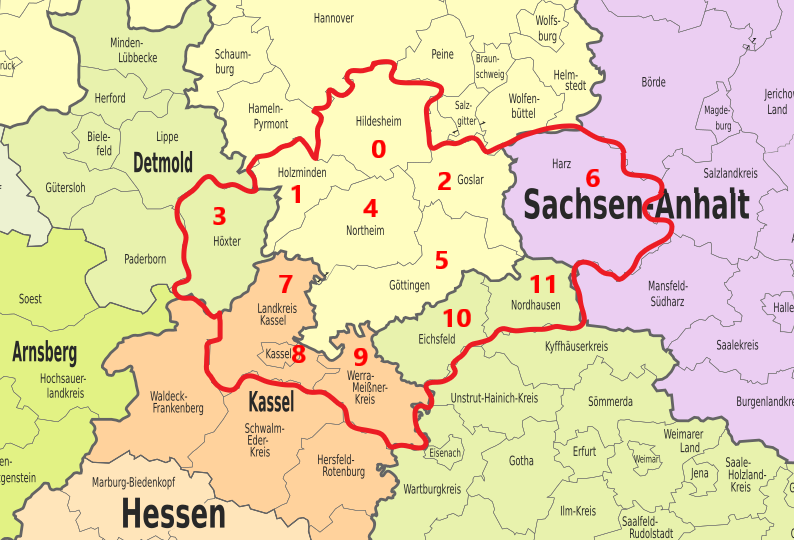

The connections between the districts are now manually identified and are entered into the *Graph Laplace Matrix* that is later useful.

In [1]:
import numpy as np


g11_laplace=np.array([[3,-1,-1,0,-1,0,0,0,0,0,0,0],
             [-1,3,0,-1,-1,0,0,0,0,0,0,0],
             [-1,0,5,0,-1,-1,-1,0,0,0,0,-1],
             [0,-1,0,2,0,0,0,-1,0,0,0,0],
             [-1,-1,-1,0,6,-1,-1,-1,0,0,0,0],
             [0,0,-1,0,-1,7,0,-1,-1,-1,-1,-1],
             [0,0,-1,0,0,0,2,0,0,0,0,-1],
             [0,0,0,-1,-1,-1,0,5,-1,-1,0,0],
             [0,0,0,0,0,-1,0,-1,2,0,0,0],
             [0,0,0,0,0,-1,0,-1,0,3,-1,0],
             [0,0,0,0,0,-1,0,0,0,-1,3,-1],
             [0,0,-1,0,0,-1,-1,0,0,0,-1,4]])

In order to assemble the graph we need to convert the Graph Laplace Matrix into the associated *Adjacence Matrix*:

In [2]:
def adjacence(lap):
    adj=-lap
    dimension=len(adj[1])
    for i in range(dimension):
        adj[i][i]=0
    return adj

g11_adjacence=adjacence(g11_laplace)

Now the graph will be assembled using *NetworkX*:

In [3]:
import networkx as nx

 
def makegraph(matrix):
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] == 1: 
                G.add_edge(i,j)
    return G

G1=makegraph(g11_adjacence)

## Intermediate Result:
Finally, we plot the Graph using *MatPlotLib*:

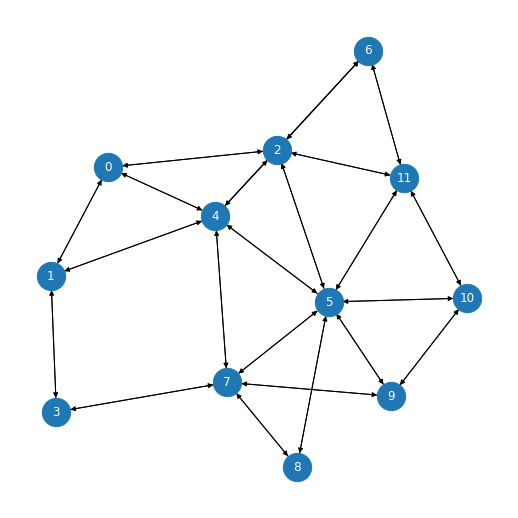

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
nx.draw(G1,node_size=800, with_labels=True, font_color='white')
plt.show() 

Now we aim for being able to have custom colors of the nodes. This can be realized using a colormap which we can easily set up using existing data.

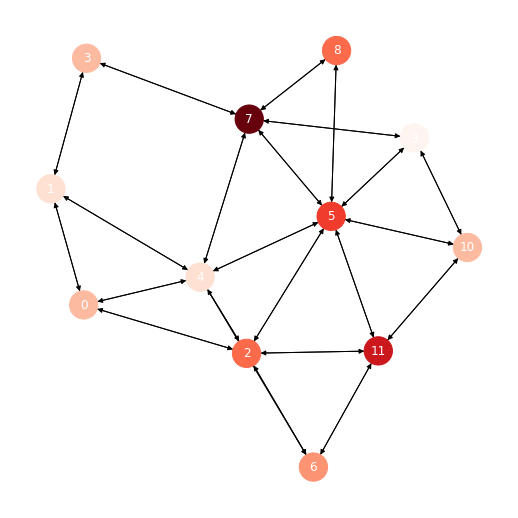

In [5]:
data=np.array([4,3,6,3,4,7,5,8,10,6,2,4])

plt.figure(figsize=(7,7))
nx.draw(G1,node_size=800, with_labels=True, font_color='white',node_color=data/10,cmap=plt.cm.Reds)
plt.show() 

# Graph Laplace Matrix Test: Application in Simple Epidemic Model

## Goal:
Apply representation of graphs to epidemic data.

## Setup:
Graph and data used from "Fifth Simulation" (Lars).
In the first step only population data is regarded to display the size of the population.

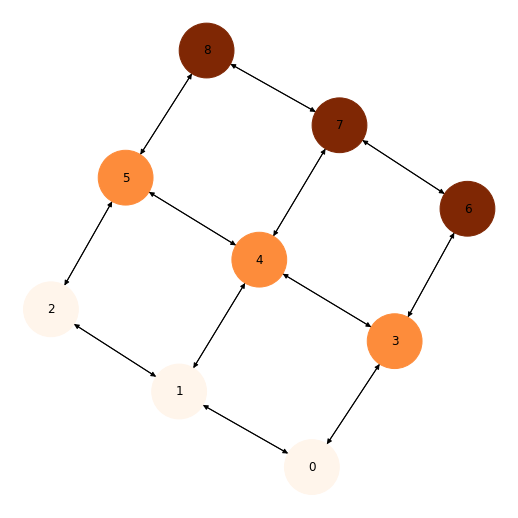

In [6]:
L = np.array([[2 , -1 , 0 , -1 , 0 , 0 , 0 , 0 , 0], 
          [-1 , 3 , -1 , 0 , -1 , 0 , 0 , 0 , 0], 
          [0 , -1 , 2 , 0 , 0 , -1 , 0 , 0 , 0], 
          [-1 , 0 , 0 , 3 , -1 , 0 , -1 , 0 , 0], 
          [0 , -1 , 0 , -1 , 4 , -1 , 0 , -1 , 0], 
          [0 , 0 , -1 , 0 , -1 , 3 , 0 , 0 , -1], 
          [0 , 0 , 0 , -1 , 0 , 0 , 2 , -1 , 0], 
          [0 , 0 , 0 , 0 , -1 , 0 , -1 , 3 , -1], 
          [0 , 0 , 0 , 0 , 0 , -1 , 0 , -1 , 2]])

N0 = np.array([2, 2, 2, 3, 3, 3, 4, 4, 4])*10**(5)

A=adjacence(L)
G2=makegraph(A)

cmap=[]
for node in G2:
    cmap.append(N0[node])

plt.figure(figsize=(7,7))
nx.draw(G2,node_size=3000, with_labels=True, font_color='black', node_color=cmap ,cmap=plt.cm.Oranges)
plt.show() 


The following cell includes the entire calculation and is directly taken from the original notebook.

In [7]:
"time span of simulation"
t = np.linspace(0, 1, 10000)
dt = t[1]-t[0]
n = len(t)

beta_0 = 3e-4  # Unit: 1/s
gamma = 5    # Unit: 1/s
zeta = 2e-5
h = 1

kappa = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])*10**(-6)

def model(F, t):
    """
    Input: Functions: F=[S1, S2, ... , I1, I2, ... R1, R2, ...]
                Time: t
                
    Return: Derivatives: dFdt=[dS1dt, dS2dt, ... , dI1dt, dI2dt, ... , dR1dt, dR2dt, ...]
    """
    
    "Array for the return values"
    dFdt = np.ones(27)
    
    for i in range(9):
        dFdt[i] = -beta_0*F[i]*F[i + 9] #dSdt
        dFdt[i + 9] = beta_0*F[i]*F[i + 9] - gamma*F[i + 9] #dIdt
        for k in range(9):
            if (L[k, i] == -1):
                """
                Finding the adjacent cells and adding the proportional terms
                """
                dFdt[i + 9] += kappa[i]*F[k + 9] #dIdt
                dFdt[i + 9] -= kappa[k]*F[i + 9] #dIdt
        
        dFdt[i + 18] = gamma*F[i + 9] #dRdt
    
    
    
    return dFdt


"Making array of inital conditions"
Initial_conditions = np.ones(27)


for i in range(9):
    Initial_conditions[18 + i] = 0 # Initial R
    Initial_conditions[9 + i] = 0  # Initial I
    if (i == 3):
        Initial_conditions[9 + i] = 20 #Giving one cell another initial I value
    Initial_conditions[i] = N0[i] - Initial_conditions[i + 9] # Initial S

    
import scipy.integrate as sci    
y = sci.odeint(model, Initial_conditions, t)

In the first step we focus on displaying an arbitrary point of time and display the density of infected persons. Also at this point we want the structure of the displayed graph to not be random in each run.

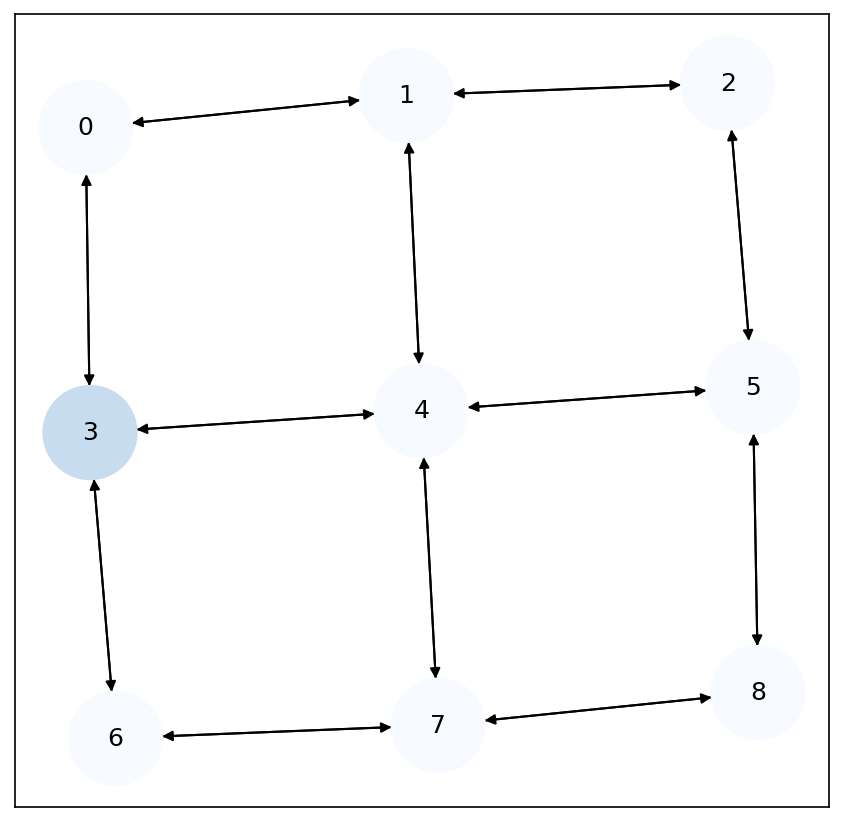

In [8]:
plt.figure(figsize=(7,7), dpi=150)
distinct_pos = nx.random_layout(G2, seed=14)
pos = nx.spring_layout(G2, pos=distinct_pos)
cmap=[]
for node in G2:
    cmap.append(y[1000,9+node]/N0[node])
nx.draw_networkx(G2,pos,node_size=2000, with_labels=True, font_color='black', node_color=cmap ,cmap=plt.cm.Blues,vmin=0, vmax=1)
plt.show() 

In the next step we generalize this process by defining the plots as functions.

In [9]:
import math

frame_setting=100
interval_setting=math.floor(10000/frame_setting)

def plot_sstate(animation_time):
    smap=[]
    for node in G2:
        smap.append(y[interval_setting*animation_time,node]/N0[node])
    q=nx.draw_networkx(G2,pos,node_size=2000, with_labels=True, font_color='black', node_color=smap ,cmap=plt.cm.Reds,vmin=0, vmax=1)
    return q

def plot_istate(animation_time):
    imap=[]
    for node in G2:
        imap.append(y[interval_setting*animation_time,node+9]/N0[node])
    q=nx.draw_networkx(G2,pos,node_size=2000, with_labels=True, font_color='black', node_color=imap ,cmap=plt.cm.Blues,vmin=0, vmax=1)
    return q

def plot_rstate(animation_time):
    rmap=[]
    for node in G2:
        rmap.append(y[interval_setting*animation_time,node+18]/N0[node])
    q=nx.draw_networkx(G2,pos,node_size=2000, with_labels=True, font_color='black', node_color=rmap ,cmap=plt.cm.Greens,vmin=0, vmax=1)
    return q

Finally we can create animations with dynamic colors of the nodes.

In [10]:
import matplotlib.cm as cm
import matplotlib.animation as animation
from IPython.display import HTML

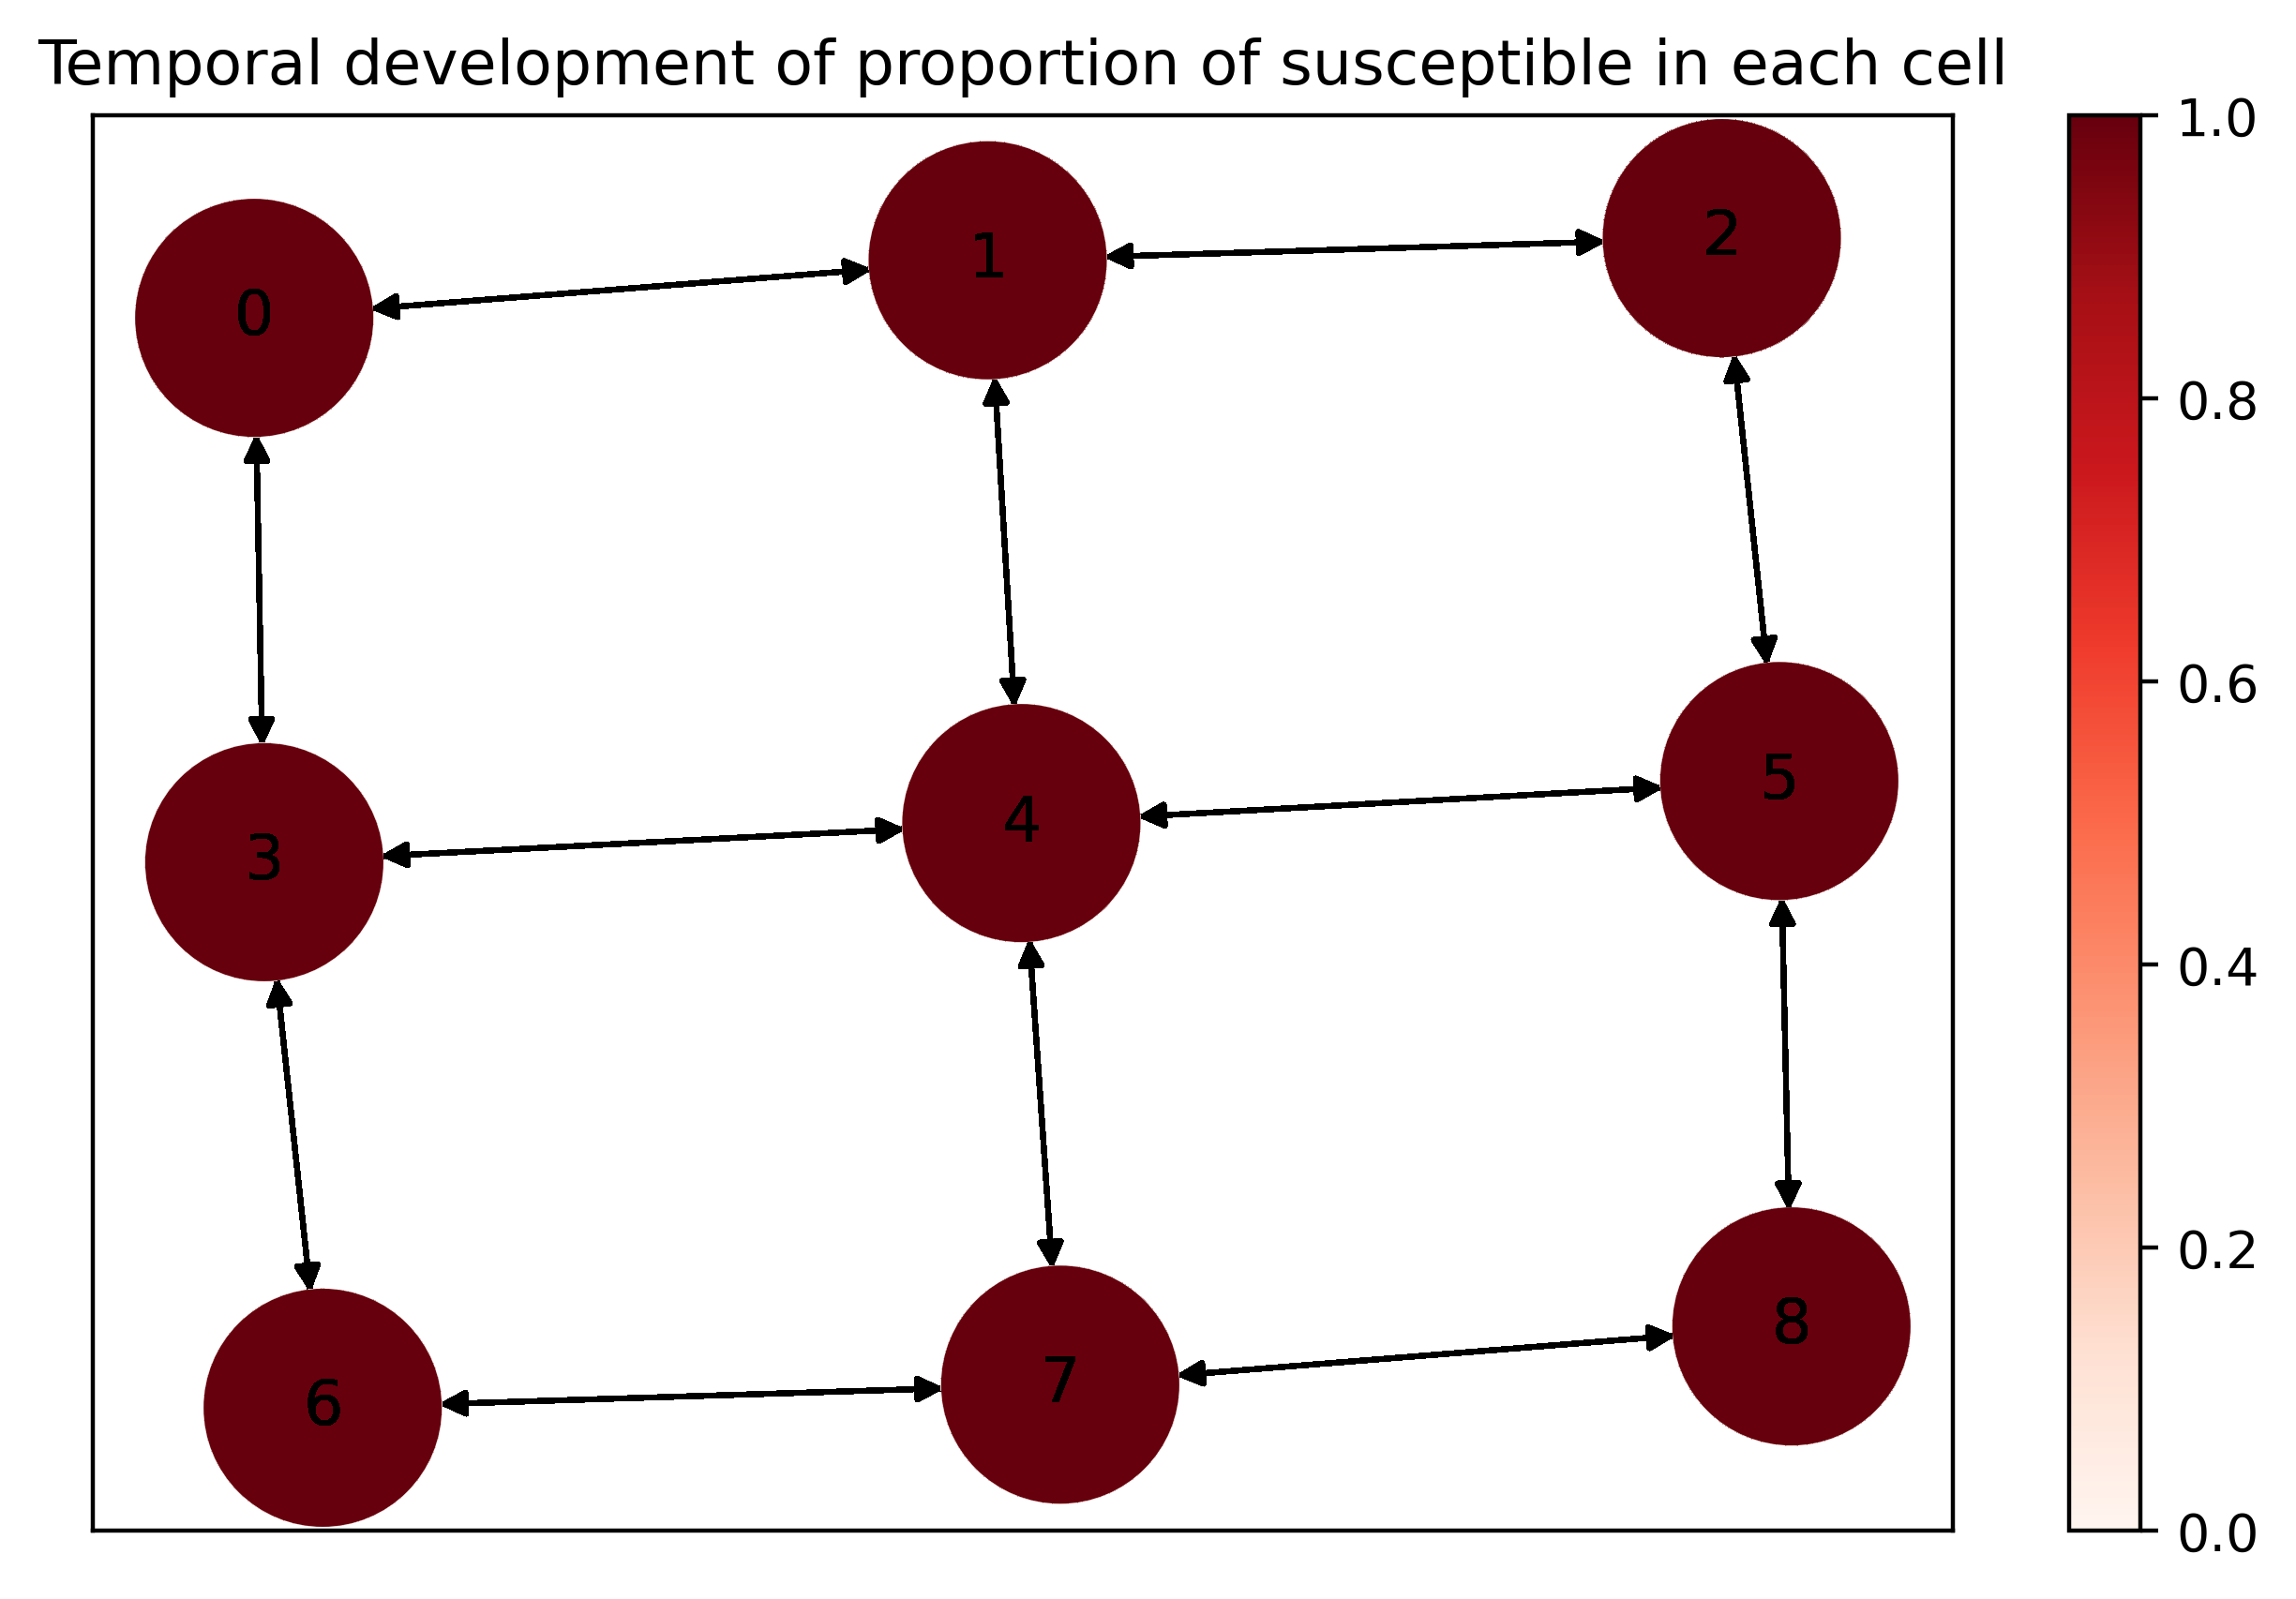

In [11]:
plt.figure(figsize=(8,5),dpi=400)
plt.title('Temporal development of proportion of susceptible in each cell')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin = 0, vmax=1))
sm._A = []
plt.colorbar(sm)
ani1 = animation.FuncAnimation(plt.gcf(), plot_sstate,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=1000)
#HTML(ani1.to_html5_video())

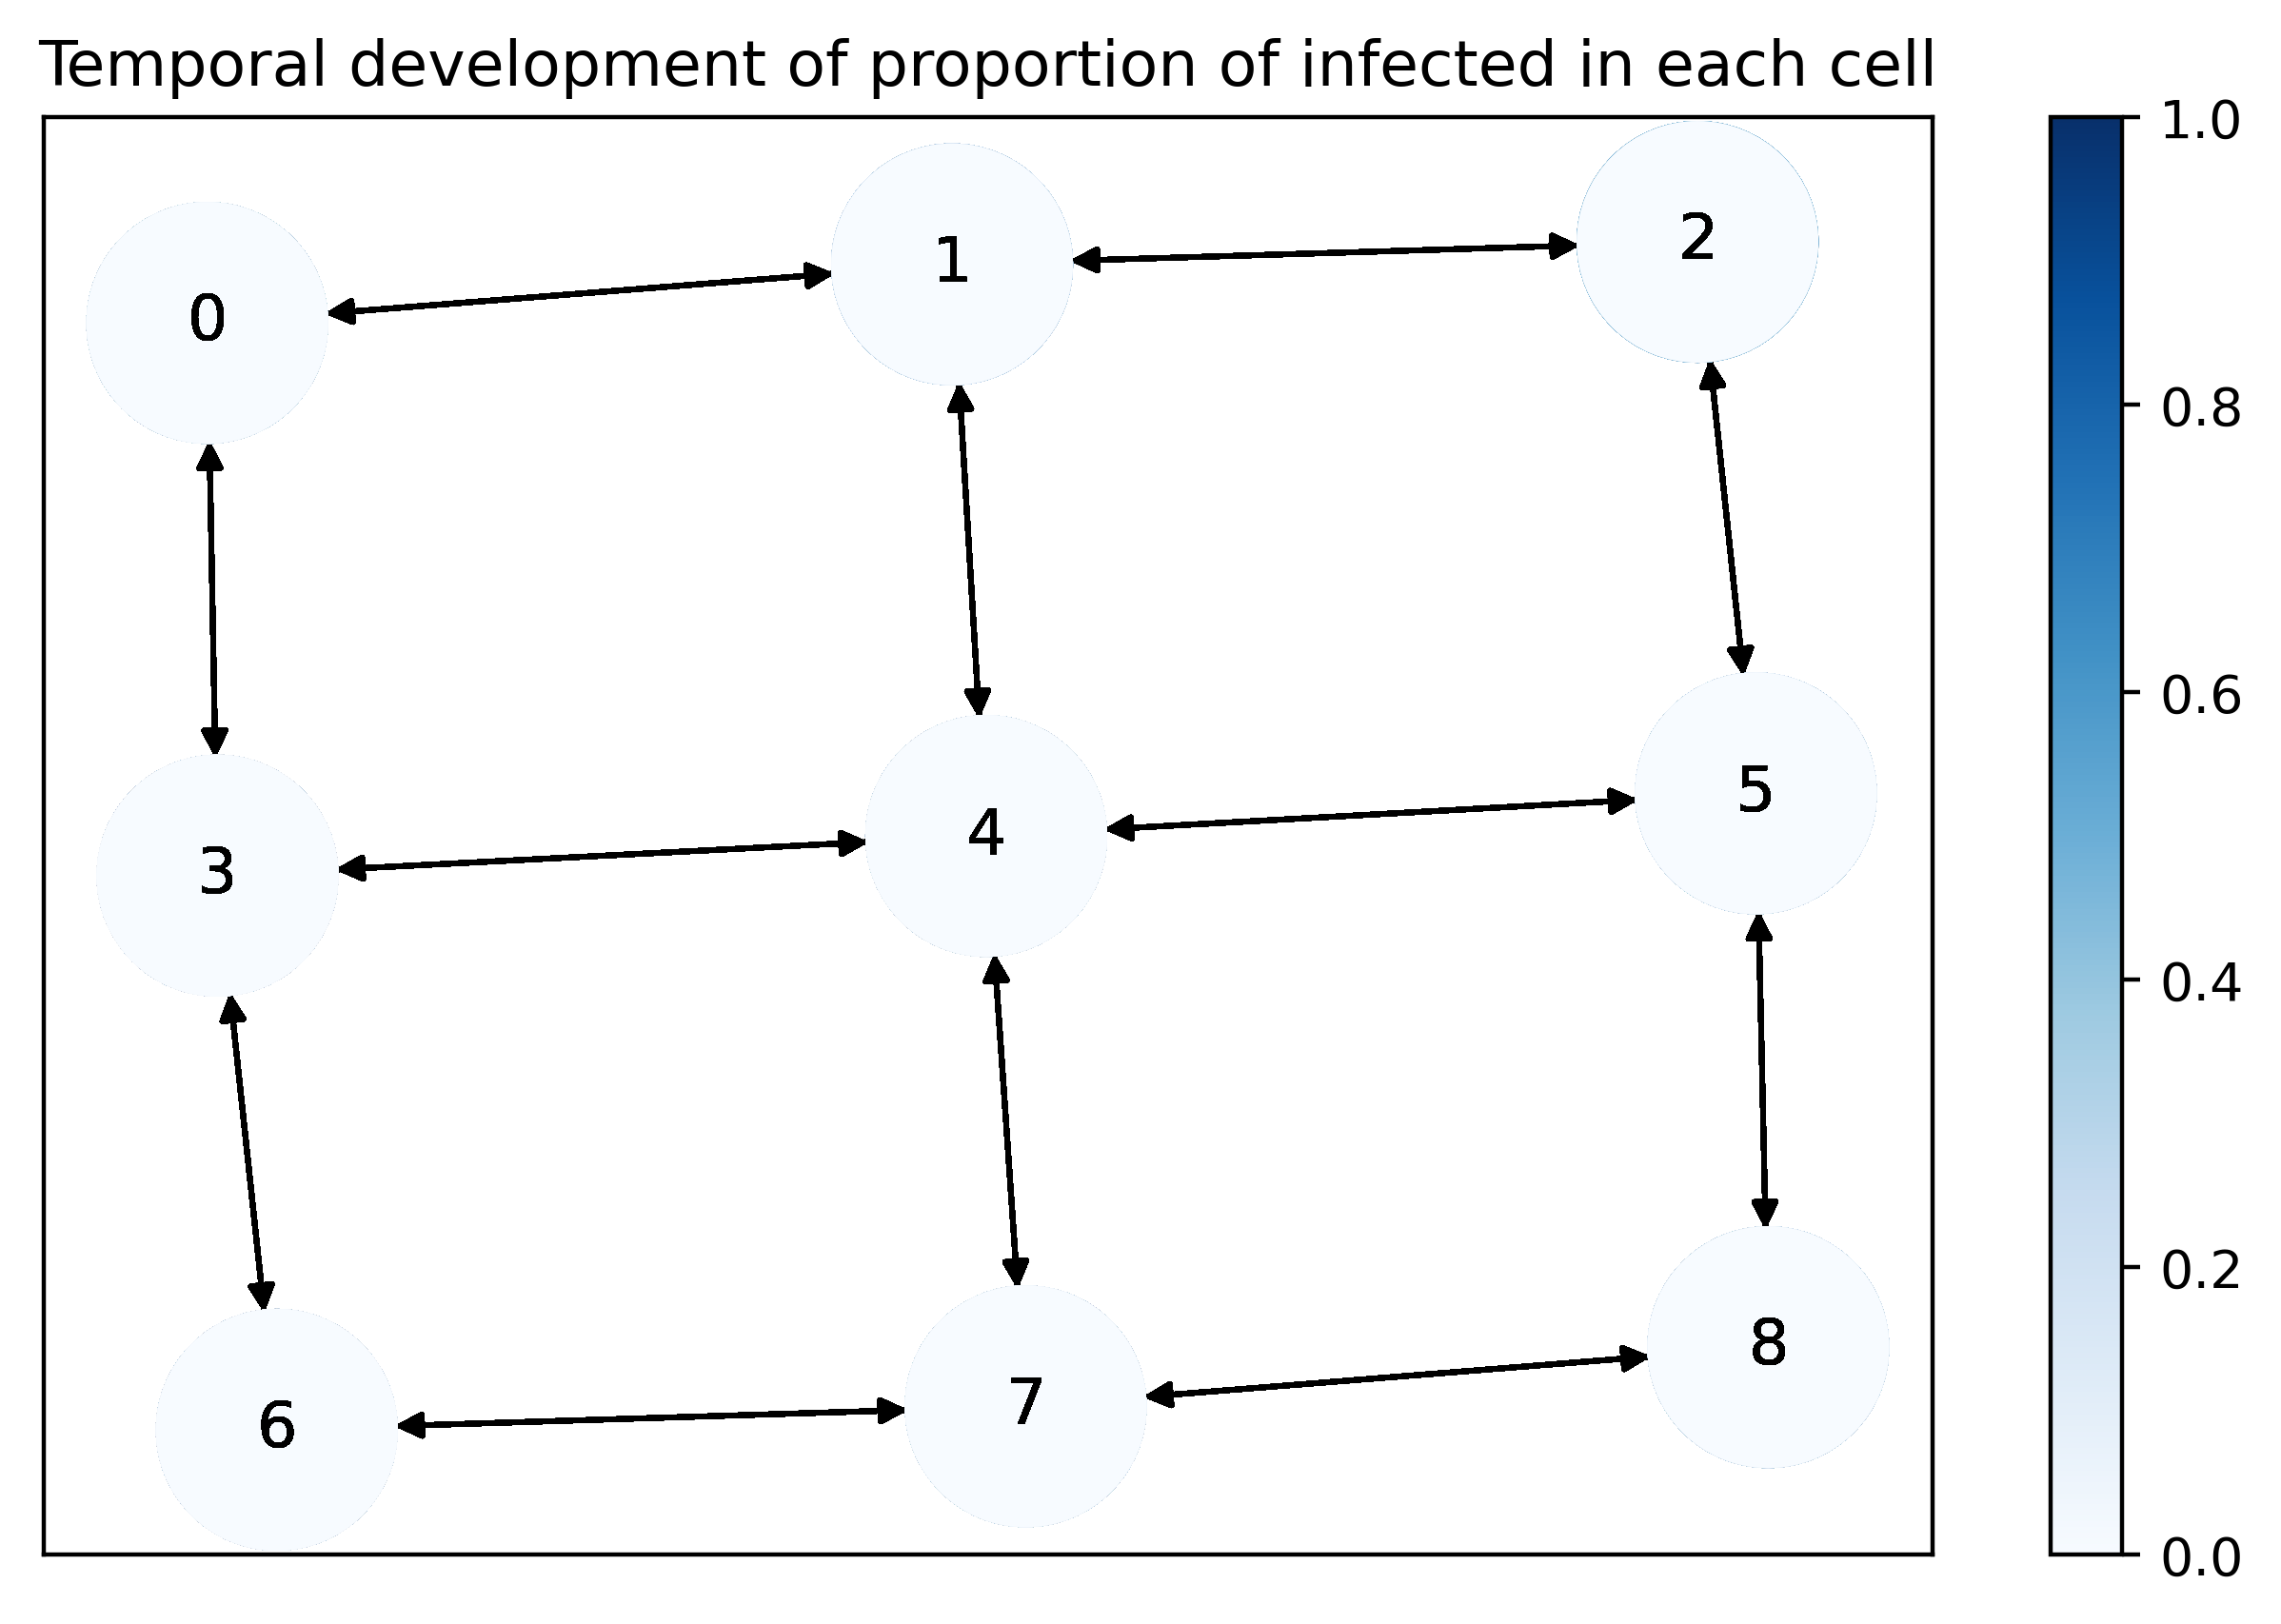

In [12]:
plt.figure(figsize=(8,5),dpi=400)
plt.title('Temporal development of proportion of infected in each cell')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
sm._A = []
plt.colorbar(sm)
ani2 = animation.FuncAnimation(plt.gcf(), plot_istate,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=1000)
#HTML(ani2.to_html5_video())

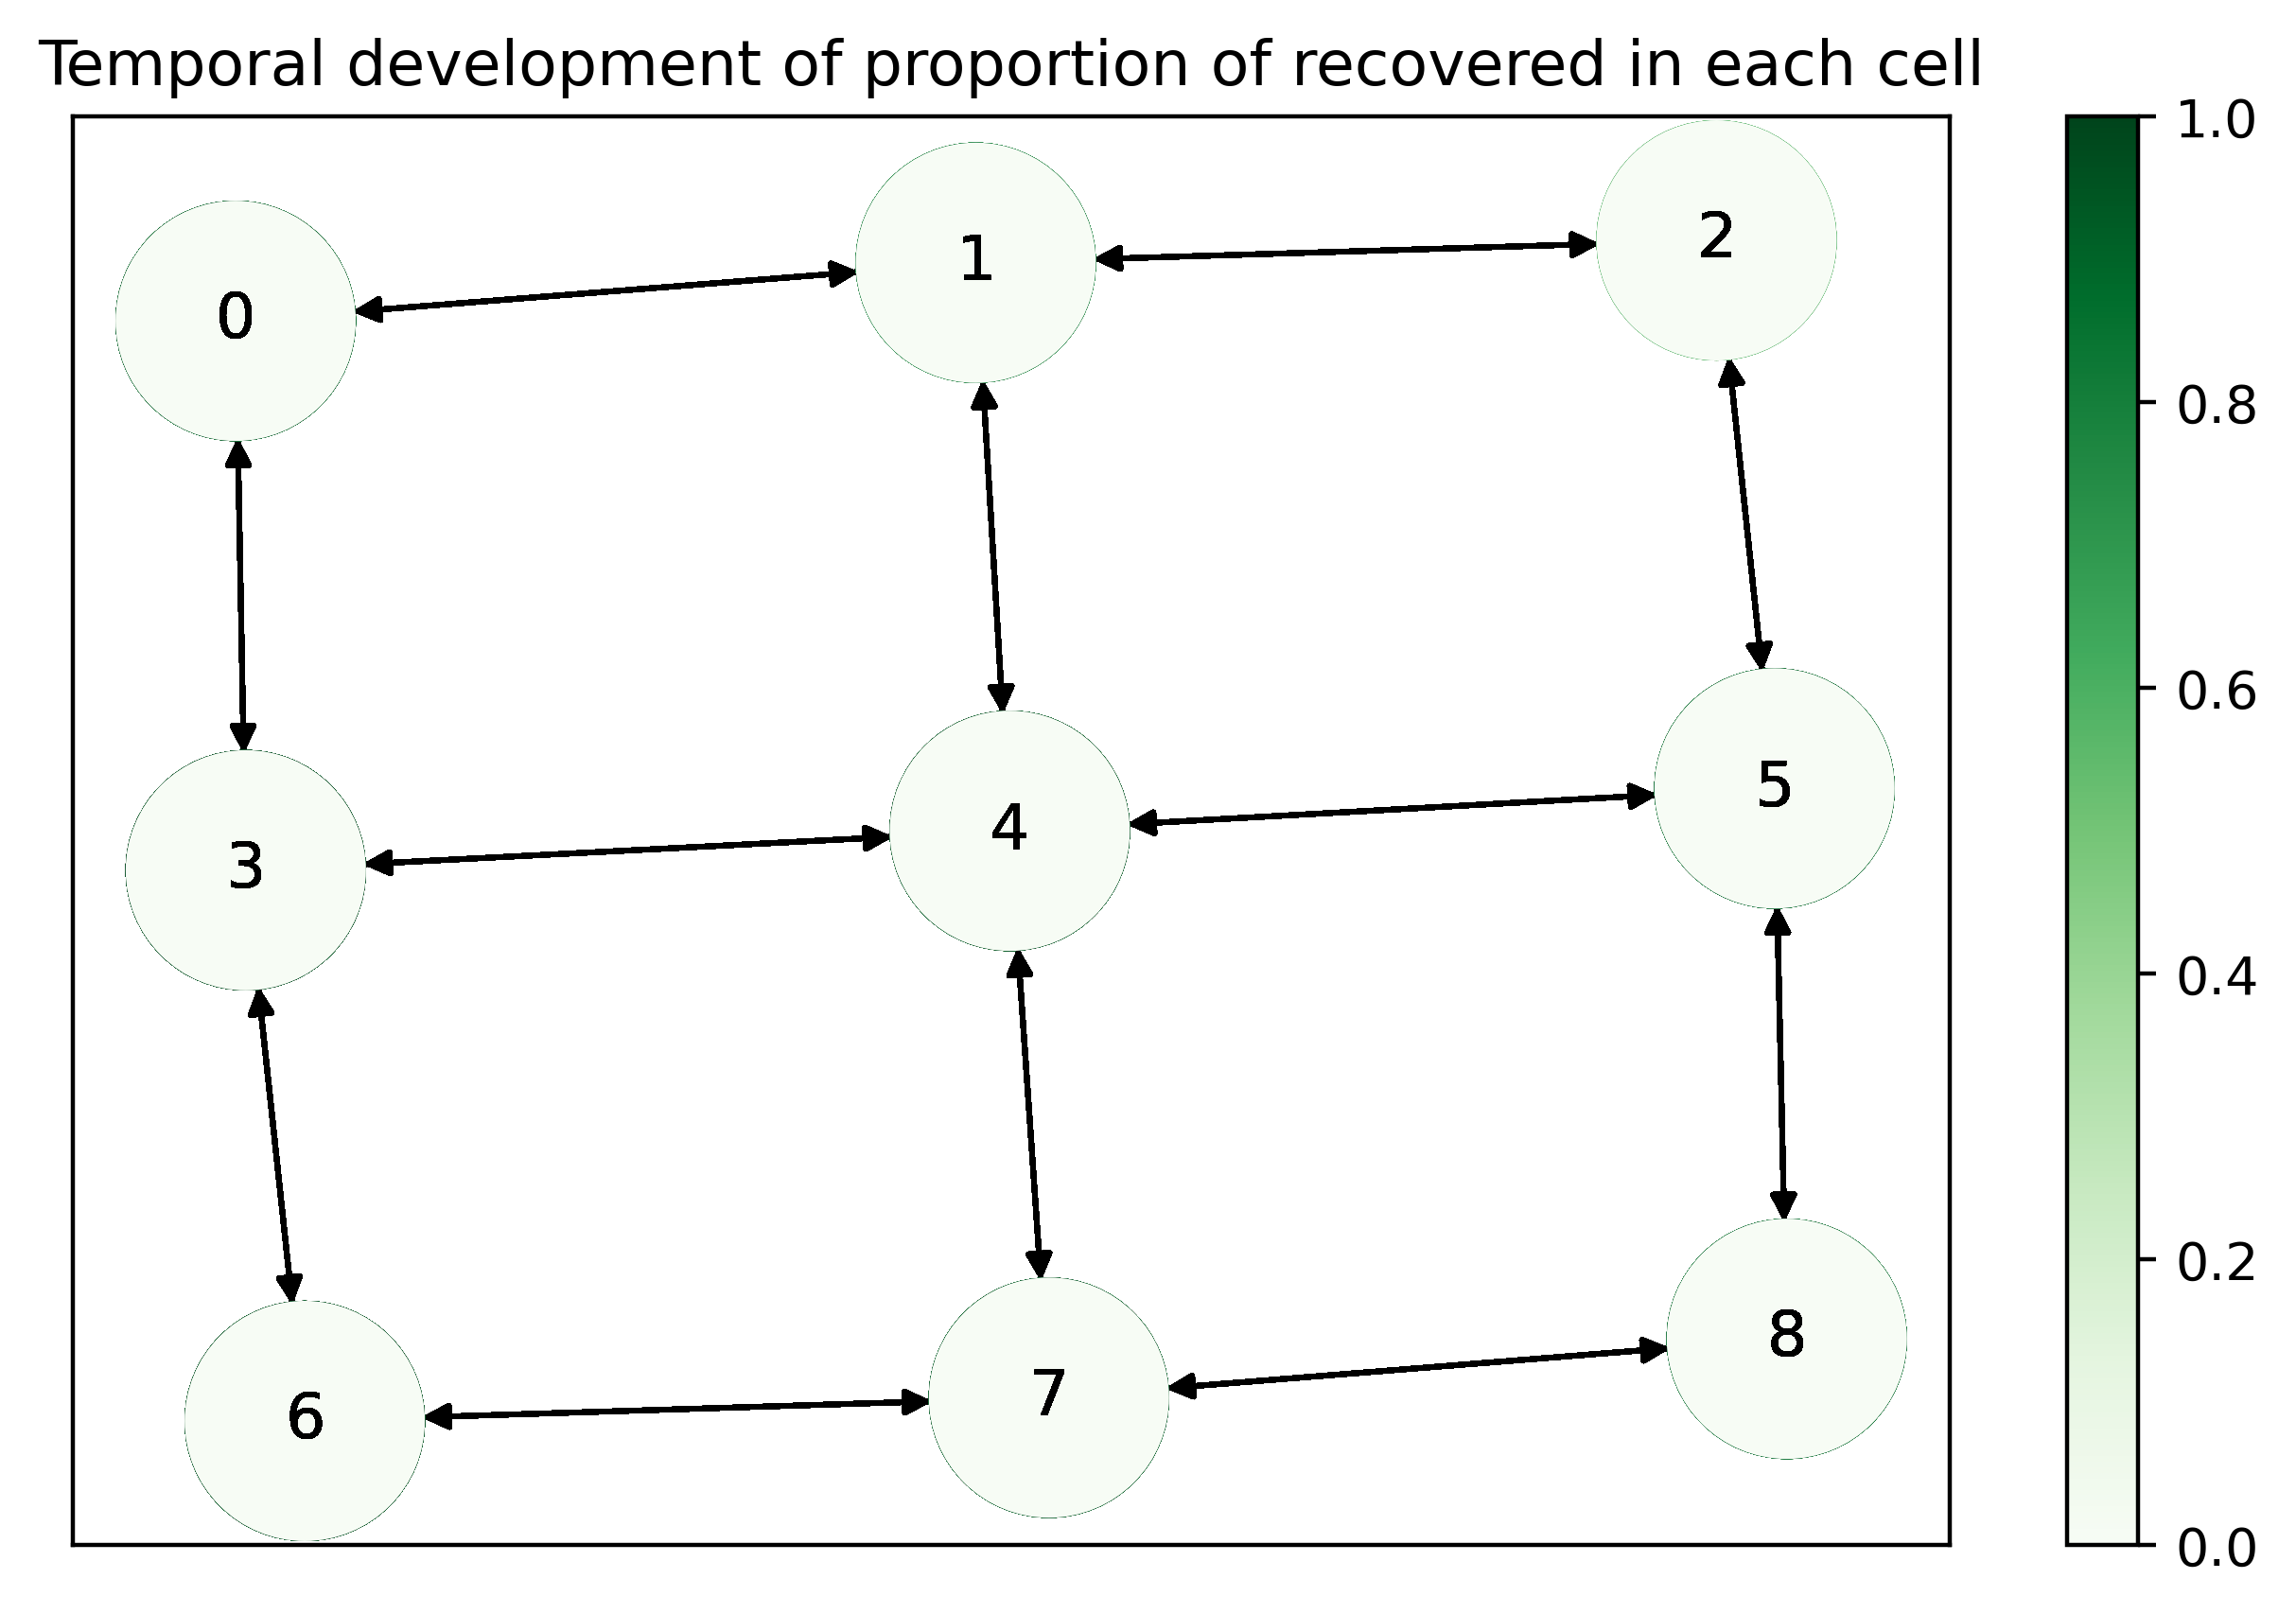

In [13]:
plt.figure(figsize=(8,5),dpi=400)
plt.title('Temporal development of proportion of recovered in each cell')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Greens, norm=plt.Normalize(vmin = 0, vmax=1))
sm._A = []
plt.colorbar(sm)
ani3 = animation.FuncAnimation(plt.gcf(), plot_rstate,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=1000)
#HTML(ani3.to_html5_video())

# Outlook
- Improve process of creating the Graph Laplace Matrix (Excel & Pandas?)
- Find better ways to plot the graph in order to resemble geographical conditions (Geopandas?)